In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Newton's Method Optimization
### Single Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐−𝟏𝟓𝒙+𝟏$,        
- Draw the functions and check out the minimum.
- Draw the 1st derivative of the function and check out the root.
- Draw 2nd derivative of the function and check out the sign at the minimum.
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.
##### The function should return the solution and the gradient.

##### Notes:
- You will need to pass the expression of the function, first, and second derivatives to the optimizer.
- You can use lambda expression to construct the function, first, and second derivatives.

In [2]:
f = lambda x: x**2 - 15*x +1
Df = lambda x: 2*x -15
DDf = lambda x: 2

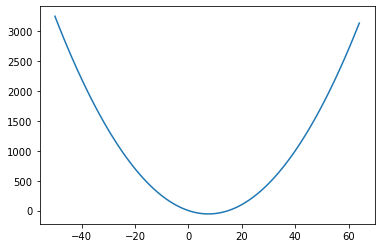

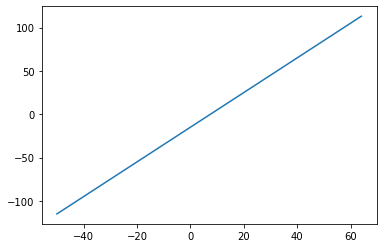

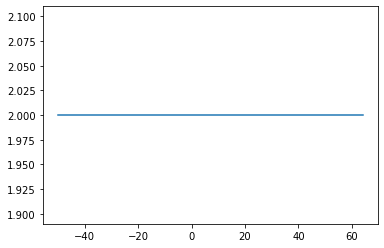

In [3]:
x = np.arange(-50,65)
# print(x)
plt.plot(x, f(x))
plt.show()
plt.plot(x, Df(x))
plt.show()
plt.plot(x, 2*np.ones(x.shape))
plt.show()

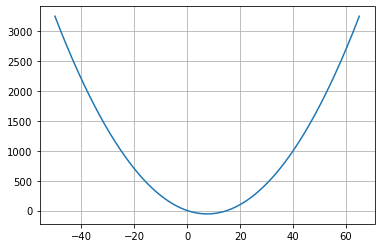

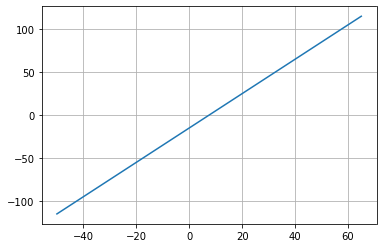

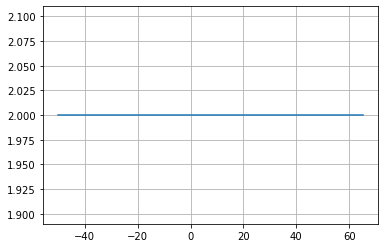

In [4]:
def gd(x0, lrr, max_itr, epsilon):
    x = x0
    lr = lrr
    for i in range(max_itr) :
        grad = Df(x)
        if abs(grad)<epsilon :
#             return x, grad, i
            print("GD Results with x0 = {}, lr= {}, epsilon= {}".format(x0, lrr, epsilon))
            print("Found solution after {} iterations.".format(i))
            print("x_min =", x)
            print("Gradiant =", grad)
            break
        else:
            x = x - lr*grad
    return x, grad, i
gd(x0=40, lrr=0.01, max_itr=1000 , epsilon = 0.1)

GD Results with x0 = 40, lr= 0.01, epsilon= 0.1
Found solution after 321 iterations.
x_min = 7.549596800192111
Gradiant = 0.09919360038422198


(7.549596800192111, 0.09919360038422198, 321)

In [6]:
# Gradient descent with learning rate = 0.01, x0=40, epsilon = 0.1


GD Results with x0 =40, lr=0.01, epsilon=0.1
Found solution after 321 iterations.
x_min = 7.549596800192111
Gradient = 0.09919360038422198


In [5]:
def newton_raphson(f, f_dash, x0, tolerance=0.0001, iterations=100):
    x_init = x0
    for i in range(iterations):
        fx0 = f(x0)
        dfx0 = f_dash(x0)
        if (dfx0 != 0):
            x1 = x0 - fx0 / dfx0
            if abs(x1 - x0) < tolerance:
                print("Newton Results with x0 = {}, epsilon= {}".format(x_init, tolerance))
                print("Found solution after {} iterations.". format(i+1))
                print("x_min =", x1)
                print("Gradient =", fx0)
                return x1,fx0, dfx0,i+1
            x0 = x1
        else:
            raise ValueError("Unallowed operation: Division by zero")
    raise ValueError("Failed to converge")

In [6]:
z= zip(newton_raphson(Df, DDf, 40, 0.1))

Newton Results with x0 = 40, epsilon= 0.1
Found solution after 2 iterations.
x_min = 7.5
Gradient = 0.0


In [7]:
# Newton's method without learning rate, x0=40, epsilon = 0.1


Newton Results with x0 =40, epsilon=0.1
Found solution after 1 iterations.
x_min = 7.5
Gradient = 0.0


In [7]:
def newton_raphson_lr(f, f_dash, x0, lr,tolerance=0.0001, iterations=100):
    x_init = x0
    for i in range(iterations):
        fx0 = f(x0)
        dfx0 = f_dash(x0)
        if (dfx0 != 0):
            x1 = x0 - lr * (fx0 / dfx0)
            if abs(x1 - x0) < tolerance:
                print("Newton Results with x0={}, epsilon={}, lr={}".format(x_init, tolerance, lr))
                print("Found solution after {} iterations.". format(i+1))
                print("x_min =", x1)
                print("Gradient =", fx0)
                return x1,fx0, dfx0,i+1
            x0 = x1
        else:
            print("Unallowed operation: Division by zero")
    print("Failed to converge")

In [8]:
z= zip(newton_raphson_lr(Df, DDf, 40, 0.8, 0.1))

Newton Results with x0=40, epsilon=0.1, lr=0.8
Found solution after 5 iterations.
x_min = 7.5104
Gradient = 0.1039999999999992


In [8]:
# Newton's method with learning rate = 0.8, x0=40, epsilon = 0.1


Newton Results  with x0 =40, epsilon=0.1, lr=0.8
Found solution after 5 iterations.
x_min = 7.5104
Gradient = 0.020799999999999486


### Multi Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$ 
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.
##### The function shgould return the solution and the gradient.

In [9]:
from sympy import *
from sympy.plotting import plot3d

$𝒇(𝒙)=𝒙^𝟐+y^2$

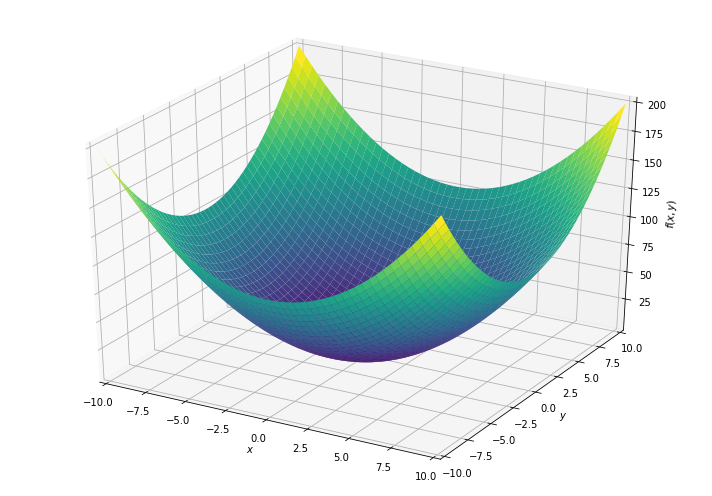

In [10]:
x,y = symbols('x y')
f = x**2 + y**2
plot3d(f,size=(10,7))
plt.show()

$𝒇(𝒙)=𝒙^𝟐+xy+y^2$  

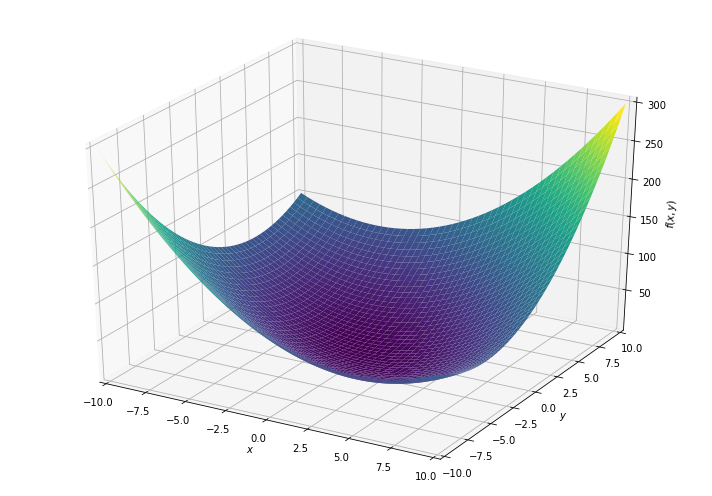

In [11]:
x,y = symbols('x y')
f = x**2 + x * y + y**2
plot3d(f,size=(10,7))
plt.show()

$𝒇(𝒙)=𝒙^𝟐y$ 

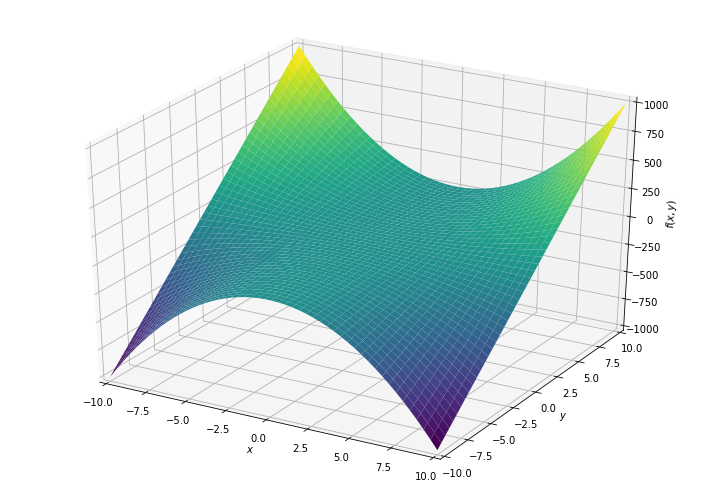

In [13]:
x,y = symbols('x y')
f = x**2 * y
plot3d(f,size=(10,7))
plt.show()

In [14]:
def multivar_gd(Df, x0, lrr, max_itr, epsilon):
    x = np.array(x0) 
    lr = lrr
    for i in range(max_itr) :
        grad = Df(x)
        grad_norm = np.linalg.norm(grad)
        if abs(grad_norm)<epsilon :
#             return x, grad, i
#             print("GD Results with x0 = {}, lr= {}, epsilon= {}".format(x0, lrr, epsilon))
            print("Found solution after {} iterations.".format(i))
            print("xy_min =", x)
            print("Gradiant =", grad)
            break
        else:
            x = x - lr*grad
    return x, grad, i

In [57]:
def multivar_newton_raphson(f, grad_f, hess_f, x0, lr, tol=1e-6, max_iter=100):
    x = x0
    for i in range(max_iter):
        grad = grad_f(x)
        hess = hess_f(x)
        dx = -np.linalg.solve(hess, grad)
        x_new = x + lr * dx
        if np.linalg.norm(x_new) < tol:
            print("Newton Results with x0 = {}, epsilon= {}".format(x0, tol))
            print("Found solution after {} iterations.". format(i+1))
            print("xy_min =", x_new.astype(float))
            print("Gradient =", grad_f(x_new))
#             x = x_new
            break
        x = x_new
    x_min = x
    return x_min


In [48]:
f_1 = lambda x: x**2  + y**2
Df_1 = lambda X: np.array([2*X[0],2*X[1]])
DDf_1 = lambda X: np.array([[2,0],
                         [0,2]])

In [49]:
# First function
# Multi-variable Gradient descent with learning rate = 0.1,
# x0=(10,10), epsilon = 0.001
x,grad,i = multivar_gd(Df = Df_1 ,x0=[10,10], lrr=0.1, max_itr=1000 , epsilon = 0.001)

Found solution after 46 iterations.
xy_min = [0.00034845 0.00034845]
Gradiant = [0.0006969 0.0006969]


In [17]:
# First function
# Multi-variable Gradient descent with learning rate = 0.1,
# x0=(10,10), epsilon = 0.001


Found solution after 46 iterations.
xy_min = [0.00034845 0.00034845]
Gradient = [0.0006969 0.0006969]


In [50]:
x,grad,i = multivar_gd(Df = Df_1 ,x0=[10,10], lrr=0.5, max_itr=1000 , epsilon = 0.001)

Found solution after 1 iterations.
xy_min = [0. 0.]
Gradiant = [0. 0.]


In [18]:
# First function
# Multi-variable Gradient descent with learning rate = 0.5,
# x0=(10,10), epsilon = 0.001


Found solution after 1 iterations.
xy_min = [0. 0.]
Gradient = [0. 0.]


In [51]:
z = multivar_newton_raphson(f_1, Df_1,DDf_1,[10,10], 1, 0.001)

Newton Results with x0 = [10, 10], epsilon= 0.001
Found solution after 1 iterations.
xy_min = [0. 0.]
Gradient = [0. 0.]


In [19]:
# First function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001


Found solution after 1 iterations.
xy_min = [0. 0.]
Gradient = [0. 0.]


In [52]:
z = multivar_newton_raphson(f_1, Df_1,DDf_1,[10,10], 0.5, 0.001)

Newton Results with x0 = [10, 10], epsilon= 0.001
Found solution after 14 iterations.
xy_min = [0.00061035 0.00061035]
Gradient = [0.0012207 0.0012207]


In [20]:
# First function
# Multi-variable Newton's method with learning rate = 0.5, 
# x0=(10,10), epsilon = 0.001



Found solution after 15 iterations.
xy_min = [0.00030518 0.00030518]
Gradient = [0.00061035 0.00061035]


In [53]:
f_2 = lambda x: x**2 + x*y + y**2
Df_2 = lambda X: np.array([2*X[0]+X[1],2*X[1]+X[0]])
DDf_2 = lambda X: np.array([[2,1],
                        [1,2]])

In [54]:
x,grad,i = multivar_gd(Df = Df_2 , x0=[10,10], lrr=0.5, max_itr=1000 , epsilon = 0.001)

Found solution after 16 iterations.
xy_min = [0.00015259 0.00015259]
Gradiant = [0.00045776 0.00045776]


In [21]:
# Second function
# Multi-variable Gradient descent with learning rate = 0.5,
# x0=(10,10), epsilon = 0.001


Found solution after 16 iterations.
xy_min = [0.00015259 0.00015259]
Gradient = [0.00045776 0.00045776]


In [55]:
z = multivar_newton_raphson(f_2, Df_2,DDf_2,[10,10], 1, 0.001)

Newton Results with x0 = [10, 10], epsilon= 0.001
Found solution after 1 iterations.
xy_min = [0. 0.]
Gradient = [0. 0.]


In [22]:
# Second function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001



Found solution after 1 iterations.
xy_min = [0. 0.]
Gradient = [0. 0.]


In [58]:
z = multivar_newton_raphson(f_2, Df_2,DDf_2,[10,10], 0.9, 0.001)

Newton Results with x0 = [10, 10], epsilon= 0.001
Found solution after 5 iterations.
xy_min = [1.e-04 1.e-04]
Gradient = [0.0003 0.0003]


In [23]:
# Second function
# Multi-variable Newton's method with learning rate = 0.9, 
# x0=(10,10), epsilon = 0.001


Found solution after 5 iterations.
xy_min = [0.0001 0.0001]
Gradient = [0.0003 0.0003]


In [30]:
f_5 = lambda x: x**2 * y
Df_5 = lambda X: np.array([2*X[0]*X[1],
                           X[0]**2])
DDf_5 = lambda X: np.array([[2*X[1],2*X[0]],
                         [2*X[0],0]])

In [31]:
x,grad,i = multivar_gd(Df = Df_5 , x0=[10,10], lrr=0.01, max_itr=1000 , epsilon = 0.001)

Found solution after 79 iterations.
xy_min = [6.80598421e-05 6.85061189e+00]
Gradiant = [9.32503127e-04 4.63214210e-09]


In [25]:
# Third function
# Multi-variable Gradient descent with learning rate = 0.01,
# x0=(10,10), epsilon = 0.001


Found solution after 79 iterations.
xy_min = [6.80598421e-05 6.85061189e+00]
Gradient = [9.32503127e-04 4.63214210e-09]


In [41]:
z = multivar_newton_raphson(f_5, Df_5, DDf_5,[10,10], 1, 0.001)

Newton Results with x0 = [10, 10], epsilon= 0.001
Found solution after 14 iterations.
xy_min = [7.4505806e-07 3.7252903e-07]
Gradient = [0.00061035 0.00061035]


In [26]:
# Third function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001


Found solution after 9 iterations.
xy_min = [0.01953125 0.01953125]
Gradient = [0.00076294 0.00038147]


## BFGS
- Implement the <b>BFGS</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$ 
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results from Gradient descent and Newton's method.

In [126]:
def bfgs(f, grad_f, x0, x1, lr=1, tolerance = 0.001, max_itr = 1000):
    
    # Initial guessing 
    B = np.eye(len(x0))
    
    x_prev = x0
    x_current=x1


    for i in range(max_itr):
        
        print("x_n-1: ")
        print(x_prev)
        
        print("x_n: ")
        print(x_current)

        print("Dfxn-1")
        print(grad_f(x_prev))
        
        print("Dfxn")
        print(grad_f(x_current))
        
        grad = grad_f(x_current)
        print('Gradient Norm:')
        print(np.linalg.norm(grad))
        
        print("B")
        print(B)
                                
        if np.linalg.norm(grad) < tolerance :
            print()
            print("*"*60)
            print()
            print("Found solution after {} iterations.".format(i))
            print("xy_min= ", x_current )
            print("Gradient= ", grad)
            break
            return x_current,grad
        
        #deltas
        dx = x_current - x_prev
        dy = grad_f(x_current) - grad_f(x_prev)
        
        #RHO
        rho = 1 / dy.dot(dx)
        B = ((np.eye(len(x0)) - rho * np.outer(dx, dy)) @ B @ (np.eye(len(x0)) - rho * np.outer(dy, dx))) + rho * np.outer(dx, dx)
        
        #Update Equations
        x_new = x_current - (lr * (np.dot(B, grad_f(x_current))))
        
        #Update and switch Xs
        x_prev = x_current
        x_current = x_new
        
        print("*"*30)
    
    return x_current,grad


In [121]:
z = zip(bfgs(f_1, Df_1, np.array([10, 10]), np.array([9, 9]), tolerance =0.001))

x_n-1: 
[10 10]
x_n: 
[9 9]
Dfxn-1
[20 20]
Dfxn
[18 18]
Gradient Norm:
25.45584412271571
B
[[1. 0.]
 [0. 1.]]
******************************
x_n-1: 
[9 9]
x_n: 
[0. 0.]
Dfxn-1
[18 18]
Dfxn
[0. 0.]
Gradient Norm:
0.0
B
[[ 0.75 -0.25]
 [-0.25  0.75]]

************************************************************

Found solution after 1 iterations.
xy_min=  [0. 0.]
Gradient=  [0. 0.]


In [28]:
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[20.]
 [20.]]
Dfxn
 [[18.]
 [18.]]
25.45584412271571
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[0.]
 [0.]]
Dfxn_1
 [[18.]
 [18.]]
Dfxn
 [[0.]
 [0.]]
0.0
*****
Found solution after 1 iterations.
xy_min = [[0.]
 [0.]]
Gradient = [[0.]
 [0.]]


In [122]:
z = zip(bfgs(f_1, Df_1, np.array([10, 10]), np.array([9, 9]), lr=0.9, tolerance =0.001))

x_n-1: 
[10 10]
x_n: 
[9 9]
Dfxn-1
[20 20]
Dfxn
[18 18]
Gradient Norm:
25.45584412271571
B
[[1. 0.]
 [0. 1.]]
******************************
x_n-1: 
[9 9]
x_n: 
[0.9 0.9]
Dfxn-1
[18 18]
Dfxn
[1.8 1.8]
Gradient Norm:
2.545584412271572
B
[[ 0.75 -0.25]
 [-0.25  0.75]]
******************************
x_n-1: 
[0.9 0.9]
x_n: 
[0.09 0.09]
Dfxn-1
[1.8 1.8]
Dfxn
[0.18 0.18]
Gradient Norm:
0.25455844122715704
B
[[ 0.75 -0.25]
 [-0.25  0.75]]
******************************
x_n-1: 
[0.09 0.09]
x_n: 
[0.009 0.009]
Dfxn-1
[0.18 0.18]
Dfxn
[0.018 0.018]
Gradient Norm:
0.025455844122715694
B
[[ 0.75 -0.25]
 [-0.25  0.75]]
******************************
x_n-1: 
[0.009 0.009]
x_n: 
[0.0009 0.0009]
Dfxn-1
[0.018 0.018]
Dfxn
[0.0018 0.0018]
Gradient Norm:
0.0025455844122715702
B
[[ 0.75 -0.25]
 [-0.25  0.75]]
******************************
x_n-1: 
[0.0009 0.0009]
x_n: 
[9.e-05 9.e-05]
Dfxn-1
[0.0018 0.0018]
Dfxn
[0.00018 0.00018]
Gradient Norm:
0.00025455844122715686
B
[[ 0.75 -0.25]
 [-0.25  0.75]]

****

In [29]:
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001, 
## learning rate =0.9


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[20.]
 [20.]]
Dfxn
 [[18.]
 [18.]]
25.45584412271571
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[0.9]
 [0.9]]
Dfxn_1
 [[18.]
 [18.]]
Dfxn
 [[1.8]
 [1.8]]
2.545584412271567
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.9]
 [0.9]]
xn
: [[0.09]
 [0.09]]
Dfxn_1
 [[1.8]
 [1.8]]
Dfxn
 [[0.18]
 [0.18]]
0.2545584412271567
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.09]
 [0.09]]
xn
: [[0.009]
 [0.009]]
Dfxn_1
 [[0.18]
 [0.18]]
Dfxn
 [[0.018]
 [0.018]]
0.025455844122715655
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.009]
 [0.009]]
xn
: [[0.0009]
 [0.0009]]
Dfxn_1
 [[0.018]
 [0.018]]
Dfxn
 [[0.0018]
 [0.0018]]
0.0025455844122715655
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.0009]
 [0.0009]]
xn
: [[9.e-05]
 [9.e-05]]
Dfxn_1
 [[0.0018]
 [0.0018]]
Dfxn
 [[0.00018]
 [0.00018]]
0.00025455844122715653


In [123]:
z = zip(bfgs(f_2, Df_2, np.array([10, 10]), np.array([9, 9]), tolerance =0.001))

x_n-1: 
[10 10]
x_n: 
[9 9]
Dfxn-1
[30 30]
Dfxn
[27 27]
Gradient Norm:
38.18376618407357
B
[[1. 0.]
 [0. 1.]]
******************************
x_n-1: 
[9 9]
x_n: 
[1.77635684e-15 1.77635684e-15]
Dfxn-1
[27 27]
Dfxn
[5.32907052e-15 5.32907052e-15]
Gradient Norm:
7.53644380168212e-15
B
[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]

************************************************************

Found solution after 1 iterations.
xy_min=  [1.77635684e-15 1.77635684e-15]
Gradient=  [5.32907052e-15 5.32907052e-15]


In [30]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[30.]
 [30.]]
Dfxn
 [[27.]
 [27.]]
38.18376618407357
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[1.77635684e-15]
 [1.77635684e-15]]
Dfxn_1
 [[27.]
 [27.]]
Dfxn
 [[5.32907052e-15]
 [5.32907052e-15]]
7.53644380168212e-15
*****
Found solution after 1 iterations.
xy_min = [[1.77635684e-15]
 [1.77635684e-15]]
Gradient = [[5.32907052e-15]
 [5.32907052e-15]]


In [124]:
z = zip(bfgs(f_2, Df_2, np.array([10, 10]), np.array([9, 9]), tolerance =0.001, lr=0.9))

x_n-1: 
[10 10]
x_n: 
[9 9]
Dfxn-1
[30 30]
Dfxn
[27 27]
Gradient Norm:
38.18376618407357
B
[[1. 0.]
 [0. 1.]]
******************************
x_n-1: 
[9 9]
x_n: 
[0.9 0.9]
Dfxn-1
[27 27]
Dfxn
[2.7 2.7]
Gradient Norm:
3.8183766184073655
B
[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
******************************
x_n-1: 
[0.9 0.9]
x_n: 
[0.09 0.09]
Dfxn-1
[2.7 2.7]
Dfxn
[0.27 0.27]
Gradient Norm:
0.38183766184073553
B
[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
******************************
x_n-1: 
[0.09 0.09]
x_n: 
[0.009 0.009]
Dfxn-1
[0.27 0.27]
Dfxn
[0.027 0.027]
Gradient Norm:
0.038183766184073605
B
[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
******************************
x_n-1: 
[0.009 0.009]
x_n: 
[0.0009 0.0009]
Dfxn-1
[0.027 0.027]
Dfxn
[0.0027 0.0027]
Gradient Norm:
0.0038183766184073484
B
[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
******************************
x_n-1: 
[0.0009 0.0009]
x_n: 
[9.e-05 9.e-05]
Dfxn-1
[0.0027 0.0027]
Df

In [31]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001,
## learning rate  = 0.9


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[30.]
 [30.]]
Dfxn
 [[27.]
 [27.]]
38.18376618407357
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[0.9]
 [0.9]]
Dfxn_1
 [[27.]
 [27.]]
Dfxn
 [[2.7]
 [2.7]]
3.8183766184073655
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.9]
 [0.9]]
xn
: [[0.09]
 [0.09]]
Dfxn_1
 [[2.7]
 [2.7]]
Dfxn
 [[0.27]
 [0.27]]
0.38183766184073553
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.09]
 [0.09]]
xn
: [[0.009]
 [0.009]]
Dfxn_1
 [[0.27]
 [0.27]]
Dfxn
 [[0.027]
 [0.027]]
0.038183766184073605
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.009]
 [0.009]]
xn
: [[0.0009]
 [0.0009]]
Dfxn_1
 [[0.027]
 [0.027]]
Dfxn
 [[0.0027]
 [0.0027]]
0.0038183766184073705
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.00

In [127]:
z = zip(bfgs(f_5, Df_5, np.array([10, 10]), np.array([9, 9]), tolerance =0.001))

x_n-1: 
[10 10]
x_n: 
[9 9]
Dfxn-1
[200 100]
Dfxn
[162  81]
Gradient Norm:
181.12150617748296
B
[[1. 0.]
 [0. 1.]]
******************************
x_n-1: 
[9 9]
x_n: 
[4.73684211 4.73684211]
Dfxn-1
[162  81]
Dfxn
[44.87534626 22.43767313]
Gradient Norm:
50.172162376034116
B
[[ 0.23976608 -0.42690058]
 [-0.42690058  0.90643275]]
******************************
x_n-1: 
[4.73684211 4.73684211]
x_n: 
[3.10344828 3.10344828]
Dfxn-1
[44.87534626 22.43767313]
Dfxn
[19.2627824  9.6313912]
Gradient Norm:
21.53644544322043
B
[[ 0.24648787 -0.4201788 ]
 [-0.4201788   0.91315453]]
******************************
x_n-1: 
[3.10344828 3.10344828]
x_n: 
[1.875 1.875]
Dfxn-1
[19.2627824  9.6313912]
Dfxn
[7.03125  3.515625]
Gradient Norm:
7.861176483398067
B
[[ 0.26473765 -0.40192901]
 [-0.40192901  0.93140432]]
******************************
x_n-1: 
[1.875 1.875]
x_n: 
[1.16883117 1.16883117]
Dfxn-1
[7.03125  3.515625]
Dfxn
[2.7323326 1.3661663]
Gradient Norm:
3.0548407181236494
B
[[ 0.28917749 -0.3774891

In [32]:
## Third function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[200.]
 [100.]]
Dfxn
 [[162.]
 [ 81.]]
181.12150617748296
*****
B_inv
 [[ 0.23976608 -0.42690058]
 [-0.42690058  0.90643275]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[4.73684211]
 [4.73684211]]
Dfxn_1
 [[162.]
 [ 81.]]
Dfxn
 [[44.87534626]
 [22.43767313]]
50.172162376034116
*****
B_inv
 [[ 0.24648787 -0.4201788 ]
 [-0.4201788   0.91315453]]
****************
xn_1:
 [[4.73684211]
 [4.73684211]]
xn
: [[3.10344828]
 [3.10344828]]
Dfxn_1
 [[44.87534626]
 [22.43767313]]
Dfxn
 [[19.2627824]
 [ 9.6313912]]
21.536445443220412
*****
B_inv
 [[ 0.26473765 -0.40192901]
 [-0.40192901  0.93140432]]
****************
xn_1:
 [[3.10344828]
 [3.10344828]]
xn
: [[1.875]
 [1.875]]
Dfxn_1
 [[19.2627824]
 [ 9.6313912]]
Dfxn
 [[7.03125 ]
 [3.515625]]
7.861176483398041
*****
B_inv
 [[ 0.28917749 -0.37748918]
 [-0.37748918  0.95584416]]
****************
xn_1:
 [[1.875]
 [1.875]]
xn
: [[1.16883117]
 [1.16883117]]
Dfxn_1
 [[7.03125 ]
 [3.515625]]
Dfxn
 [[2.732332

### Conclusion:

- SGD takes the most iterations
- Newton-Raphson takes less than SGD
- BFGS is the least and the most optimized 
- All of them perform better with learning rate